In [1]:
import os

os.environ['KMP_DUPLICATE_LIB_OK']='True'


In [56]:
pwd

'e:\\Project\\dsr32\\12NLP_Transfer_Learning'

In [2]:
import tensorflow_datasets as tfds
import tensorflow as tf
from tensorflow.keras import models, layers
import numpy as np
import matplotlib.pyplot as plt

c:\Users\DAnand\anaconda3\envs\tf\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
c:\Users\DAnand\anaconda3\envs\tf\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
(mnist_train, mnist_validate, mnist_test), info = tfds.load(
    name="mnist",
    split=["train[0:80%]", "train[80%:100%]", "test"], #train, validate, test
    with_info=True,
    as_supervised=True
)

print(info)

tfds.core.DatasetInfo(
    name='mnist',
    full_name='mnist/3.0.1',
    description="""
    The MNIST database of handwritten digits.
    """,
    homepage='http://yann.lecun.com/exdb/mnist/',
    data_path='C:\\Users\\DAnand\\tensorflow_datasets\\mnist\\3.0.1',
    file_format=tfrecord,
    download_size=11.06 MiB,
    dataset_size=21.00 MiB,
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=10000, num_shards=1>,
        'train': <SplitInfo num_examples=60000, num_shards=1>,
    },
    citation="""@article{lecun2010mnist,
      title={MNIST handwritten digit database},
      author={LeCun, Yann and Cortes, Corinna and Burges, CJ},
      journal={ATT Labs [Online]. Available: http://yann.lecun.com/exdb/mnist},
      volume={2},
      year={2010}
    

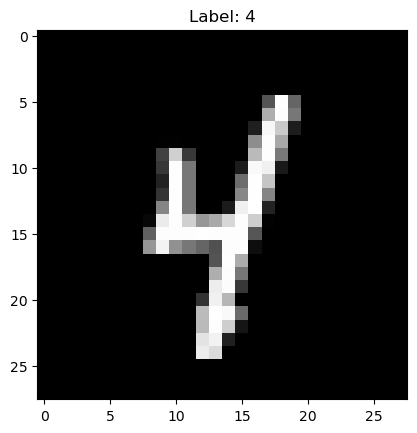

In [4]:
for image, label in mnist_train.take(1):
    plt.imshow(image.numpy().squeeze(), cmap="gray")
    plt.title(f"Label: {label}")
    plt.show()

In [6]:
# mnist_train_pipline = mnist_train.map(lambda image, label:encode(image, label))
# mnist_validate__pipline = mnist_validate.map(lambda image, label:encode(image, label))
# mnist_test_pipline = mnist_test.map(lambda image, label:encode(image, label))

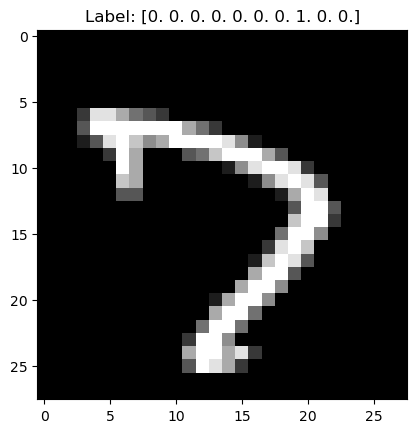

In [7]:
def encode(image, label):
    image_encoded = tf.image.convert_image_dtype(image, dtype=tf.float32) #convert the data type
    label_encode = tf.one_hot(label, depth=10) #one hot encoding

    return image_encoded, label_encode

mnist_train_pipline = mnist_train.map(lambda image, label:encode(image, label))
mnist_validate__pipline = mnist_validate.map(lambda image, label:encode(image, label))
mnist_test_pipline = mnist_test.map(lambda image, label:encode(image, label))

for image, label in mnist_train_pipline.shuffle(1000).take(1):
  plt.imshow(image.numpy().squeeze(), cmap="gray")
  plt.title(f"Label: {label}")
  plt.show()

In [8]:
model = models.Sequential()
model.add(layers.Flatten(input_shape=(28, 28, 1)))

model.summary()
#none in 'Output Shape' stands for number of samples

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
Total params: 0
Trainable params: 0
Non-trainable params: 0
_________________________________________________________________


In [9]:
model = models.Sequential()
model.add(layers.Flatten(input_shape=(28, 28, 1)))
model.add(layers.Dense(512, activation="relu"))
model.add(layers.Dense(10, activation="softmax"))
model.summary()

model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [10]:
for image, label in mnist_test_pipline.batch(1).take(1):
    print(image.shape, label.shape)

    model.predict(image)

(1, 28, 28, 1) (1, 10)
1/1 [==============================] - 0s 102ms/step


(1, 28, 28, 1) (1, 10)
1/1 [==============================] - 0s 35ms/step
(1, 10)


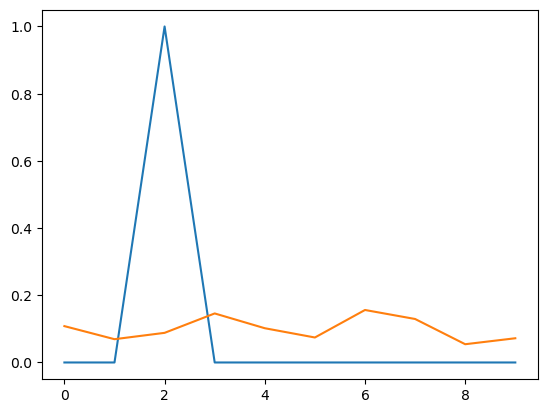

In [11]:
for image, label in mnist_test_pipline.batch(1).take(1):
    print(image.shape, label.shape)
    plt.plot(label[0])
    prediction = model.predict(image)
    print(prediction.shape)
    plt.plot(prediction[0])
# model.predict()

In [12]:
loss, accuracy = model.evaluate(mnist_test_pipline.batch(32), verbose=0)
print(loss)
print(accuracy)

2.315825939178467
0.1143999993801117


In [13]:
# use batch size ~ maxout the memery 

history = model.fit(
    mnist_train_pipline.shuffle(100).batch(128),
    epochs=5,
    validation_data=mnist_validate__pipline.batch(128)
)

Epoch 1/5
375/375 [==============================] - 5s 10ms/step - loss: 0.2989 - accuracy: 0.9137 - val_loss: 0.1755 - val_accuracy: 0.9528
Epoch 2/5
375/375 [==============================] - 3s 7ms/step - loss: 0.1260 - accuracy: 0.9640 - val_loss: 0.1232 - val_accuracy: 0.9655
Epoch 3/5
375/375 [==============================] - 2s 6ms/step - loss: 0.0823 - accuracy: 0.9771 - val_loss: 0.1023 - val_accuracy: 0.9696
Epoch 4/5
375/375 [==============================] - 3s 9ms/step - loss: 0.0575 - accuracy: 0.9845 - val_loss: 0.0904 - val_accuracy: 0.9741
Epoch 5/5
375/375 [==============================] - 3s 9ms/step - loss: 0.0412 - accuracy: 0.9893 - val_loss: 0.0852 - val_accuracy: 0.9758


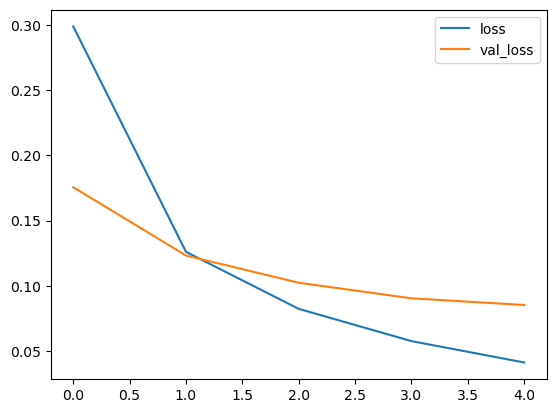

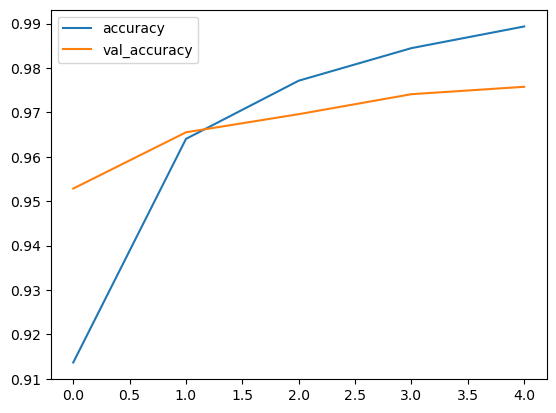

In [14]:
plt.plot(history.history["loss"], label="loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.legend()
plt.show()
plt.close()
plt.plot(history.history["accuracy"], label="accuracy")
plt.plot(history.history["val_accuracy"], label="val_accuracy")
plt.legend()
plt.show()
plt.close()

#overfitting - gradual increase in accuracy in train comapred to val

#important to arrive till point as quickly as possible

In [15]:
!nvidia-smi

Tue Oct 25 16:03:57 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 522.25       Driver Version: 522.25       CUDA Version: 11.8     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ... WDDM  | 00000000:01:00.0 Off |                  N/A |
| N/A    0C    P0    N/A /  N/A |      0MiB /  4096MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [34]:
model = models.Sequential()
model.add(layers.Flatten(input_shape=(28, 28, 1)))
model.add(layers.Dense(256, activation="relu"))
model.add(layers.Dense(10, activation="softmax"))
model.summary()

model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 784)               0         
                                                                 
 dense_10 (Dense)            (None, 256)               200960    
                                                                 
 dense_11 (Dense)            (None, 10)                2570      
                                                                 
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


In [35]:
# to use 100% of the GPU memory batch size can be optimized 

history = model.fit(
    mnist_train_pipline.shuffle(24000).batch(128),
    epochs=10,
    validation_data=mnist_validate__pipline.batch(128)
)

Epoch 1/10
375/375 [==============================] - 3s 6ms/step - loss: 0.3351 - accuracy: 0.9075 - val_loss: 0.1934 - val_accuracy: 0.9468
Epoch 2/10
375/375 [==============================] - 2s 5ms/step - loss: 0.1478 - accuracy: 0.9575 - val_loss: 0.1394 - val_accuracy: 0.9613
Epoch 3/10
375/375 [==============================] - 2s 5ms/step - loss: 0.1011 - accuracy: 0.9712 - val_loss: 0.1085 - val_accuracy: 0.9685
Epoch 4/10
375/375 [==============================] - 2s 5ms/step - loss: 0.0759 - accuracy: 0.9776 - val_loss: 0.1005 - val_accuracy: 0.9709
Epoch 5/10
375/375 [==============================] - 2s 5ms/step - loss: 0.0592 - accuracy: 0.9829 - val_loss: 0.0886 - val_accuracy: 0.9737
Epoch 6/10
375/375 [==============================] - 2s 5ms/step - loss: 0.0459 - accuracy: 0.9869 - val_loss: 0.0834 - val_accuracy: 0.9752
Epoch 7/10
375/375 [==============================] - 2s 5ms/step - loss: 0.0375 - accuracy: 0.9894 - val_loss: 0.0869 - val_accuracy: 0.9740
Epoch 

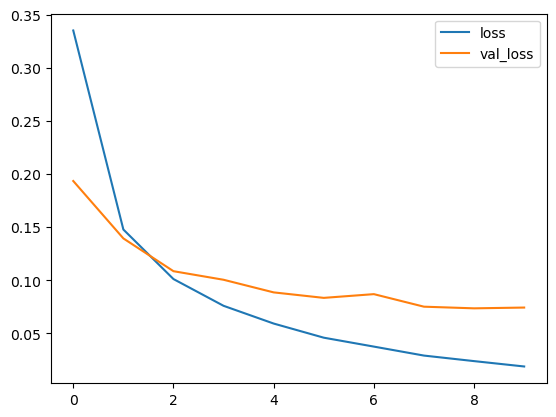

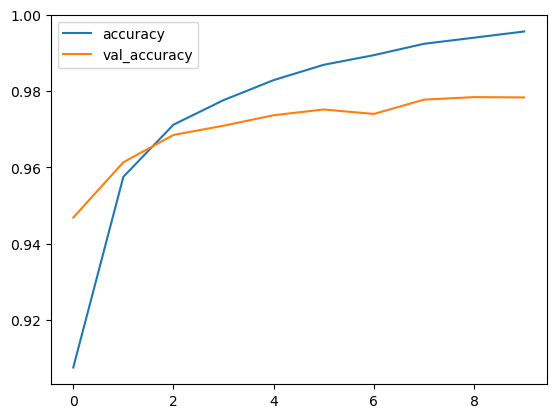

In [36]:
plt.plot(history.history["loss"], label="loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.legend()
plt.show()
plt.close()
plt.plot(history.history["accuracy"], label="accuracy")
plt.plot(history.history["val_accuracy"], label="val_accuracy")
plt.legend()
plt.show()
plt.close()

#overfitting - gradual increase in accuracy in train comapred to val

#important to arrive till point as quickly as possible

In [53]:
#most of the time ReLu is used... for bnary classification Tanh/Sigmoid are used.
model = models.Sequential()
model.add(layers.Flatten(input_shape=(28, 28, 1)))
model.add(layers.Dense(512, activation="relu"))
model.add(layers.Dense(256, activation="relu"))
model.add(layers.Dense(128, activation="sigmoid"))
model.add(layers.Dense(10, activation="softmax"))
model.summary()

model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_12 (Flatten)        (None, 784)               0         
                                                                 
 dense_30 (Dense)            (None, 512)               401920    
                                                                 
 dense_31 (Dense)            (None, 256)               131328    
                                                                 
 dense_32 (Dense)            (None, 128)               32896     
                                                                 
 dense_33 (Dense)            (None, 10)                1290      
                                                                 
Total params: 567,434
Trainable params: 567,434
Non-trainable params: 0
_________________________________________________________________


In [54]:
# to use 100% of the GPU memory batch size can be optimized 

history = model.fit(
    mnist_train_pipline.shuffle(48000).batch(128),
    epochs=15,
    validation_data=mnist_validate__pipline.batch(128)
)

Epoch 1/15
375/375 [==============================] - 4s 8ms/step - loss: 0.3336 - accuracy: 0.9103 - val_loss: 0.1553 - val_accuracy: 0.9556
Epoch 2/15
375/375 [==============================] - 3s 7ms/step - loss: 0.1077 - accuracy: 0.9681 - val_loss: 0.1081 - val_accuracy: 0.9688
Epoch 3/15
375/375 [==============================] - 3s 7ms/step - loss: 0.0682 - accuracy: 0.9798 - val_loss: 0.0899 - val_accuracy: 0.9727
Epoch 4/15
375/375 [==============================] - 3s 7ms/step - loss: 0.0468 - accuracy: 0.9858 - val_loss: 0.0851 - val_accuracy: 0.9742
Epoch 5/15
375/375 [==============================] - 3s 8ms/step - loss: 0.0331 - accuracy: 0.9905 - val_loss: 0.0786 - val_accuracy: 0.9754
Epoch 6/15
375/375 [==============================] - 3s 7ms/step - loss: 0.0248 - accuracy: 0.9925 - val_loss: 0.0789 - val_accuracy: 0.9782
Epoch 7/15
375/375 [==============================] - 3s 7ms/step - loss: 0.0208 - accuracy: 0.9934 - val_loss: 0.0787 - val_accuracy: 0.9784
Epoch 

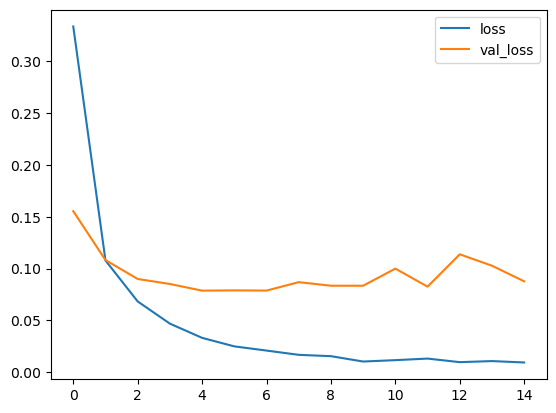

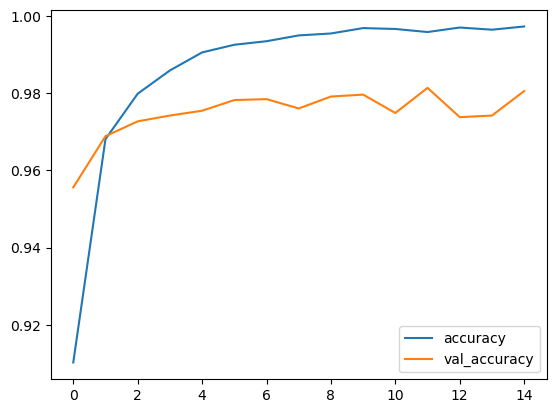

In [55]:
plt.plot(history.history["loss"], label="loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.legend()
plt.show()
plt.close()
plt.plot(history.history["accuracy"], label="accuracy")
plt.plot(history.history["val_accuracy"], label="val_accuracy")
plt.legend()
plt.show()
plt.close()

#overfitting - gradual increase in accuracy in train comapred to val

#important to arrive till point as quickly as possible